In [ ]:
#Import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


In [ ]:
# Load datasets
orders_df = pd.read_csv("/content/drive/MyDrive/List_of_Orders_55FFC79CF8.csv").dropna() #drop the null values
target_df = pd.read_csv("/content/drive/MyDrive/Sales_target_DD2E9B96A0.csv").dropna() #drop the null values
details_df = pd.read_csv("/content/drive/MyDrive/Order_Details_19795F61CF.csv").dropna()

In [ ]:
orders_df

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
495,B-26096,28-03-2019,Atharv,West Bengal,Kolkata
496,B-26097,28-03-2019,Vini,Karnataka,Bangalore
497,B-26098,29-03-2019,Pinky,Jammu and Kashmir,Kashmir
498,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai


In [ ]:
target_df #

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


In [ ]:
details_df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [ ]:
# PART 1

merged_df = pd.merge(details_df, orders_df, on="Order ID") #merge the list of orders excelsheet with order details on the basis of order_id
merged_df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones,30-03-2019,Bhishm,Maharashtra,Mumbai
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,30-03-2019,Bhishm,Maharashtra,Mumbai
1497,B-26100,828.0,230.0,2,Furniture,Chairs,31-03-2019,Hitika,Madhya Pradesh,Indore
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,31-03-2019,Hitika,Madhya Pradesh,Indore


In [ ]:
category_sales = merged_df.groupby("Category")["Amount"].sum().reset_index() #calculate the sum of amount of each category
category_profit = merged_df.groupby("Category")["Profit"].sum().reset_index() #calculate the sum of profit of each category
category_orders = merged_df.groupby("Category")["Order ID"].nunique().reset_index() #calculate the no.of order executed for each category

In [ ]:
category_sales

,Category,Amount
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


In [ ]:
category_profit

,Category,Profit
0,Clothing,11163.0
1,Electronics,10494.0
2,Furniture,2298.0


In [ ]:
category_orders #No.of Orders executed in each category

,Category,Order ID
0,Clothing,393
1,Electronics,204
2,Furniture,186


In [ ]:
# Calculate metrics
category_analysis = category_sales.merge(category_profit, on="Category").merge(category_orders, on="Category")
#merge each category sales with their profit and calculate avg profit/order and their profit margin
category_analysis["Avg Profit per Order"] = category_analysis["Profit"] / category_analysis["Order ID"]
category_analysis["Profit Margin %"] = (category_analysis["Profit"] / category_analysis["Amount"]) * 100


In [ ]:
category_analysis

,Category,Amount,Profit,Order ID,Avg Profit per Order,Profit Margin %
0,Clothing,139054.0,11163.0,393,28.404580,8.027817
1,Electronics,165267.0,10494.0,204,51.441176,6.349725
2,Furniture,127181.0,2298.0,186,12.354839,1.806874


In [ ]:
# Identify top and underperforming categories
top_category = category_analysis.sort_values("Profit Margin %", ascending=False).iloc[0]
underperforming_category = category_analysis.sort_values("Profit Margin %", ascending=True).iloc[0]
#in terms of Profit Margins, it tells category performs better or underperformed
print("Top Performing Category:")
print(top_category)
print("\nUnderperforming Category:")
print(underperforming_category)

Top Performing Category:
Category                Clothing
Amount                  139054.0
Profit                   11163.0
Order ID                     393
Avg Profit per Order    28.40458
Profit Margin %         8.027817
Name: 0, dtype: object

Underperforming Category:
Category                Furniture
Amount                   127181.0
Profit                     2298.0
Order ID                      186
Avg Profit per Order    12.354839
Profit Margin %          1.806874
Name: 2, dtype: object


REASONS FOR CLOTHING BEING A TOP PERFORMING CATEGORY
- Clothes being an affordable, cheaper option to purchase and easy to convenient.
- Generally lower in price, which Customers tend to buy multiple clothing items per order, increasing total sales.
- Low-cost production and seasonal promotions
- Clothing has higher markup percentages compared to furniture.

REASONS FOR FURNITURE UNDER PERFORMED
- Furniture items are expensive and require larger investments, leading to fewer orders.
- Higher Transportation and Maintenance Costs.
- Consumers buy furniture less frequently, reducing overall sales volume.
- Longer Delivery time and Installation time takes a roadblock
- Economic factors like housing market fluctuations can impact furniture demand.

In [ ]:
# Part 2: Target Achievement Analysis for Furniture

#Using the Sales Target dataset, calculate the percentage change in target sales for the Furniture category month-over-month.
furniture_target = target_df[target_df["Category"] == "Furniture"]
furniture_target.sort_values("Month of Order Date", inplace=True)

furniture_target["Target Change %"] = furniture_target["Target"].pct_change() * 100
furniture_target


<ipython-input-40-1ef0235542a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_target.sort_values("Month of Order Date", inplace=True)
<ipython-input-40-1ef0235542a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_target["Target Change %"] = furniture_target["Target"].pct_change() * 100


,Month of Order Date,Category,Target,Target Change %
0,Apr-18,Furniture,10400.0,NaN
4,Aug-18,Furniture,10900.0,4.807692
8,Dec-18,Furniture,11400.0,4.587156
10,Feb-19,Furniture,11600.0,1.754386
9,Jan-19,Furniture,11500.0,-0.862069
3,Jul-18,Furniture,10800.0,-6.086957
2,Jun-18,Furniture,10600.0,-1.851852
11,Mar-19,Furniture,11800.0,11.320755
1,May-18,Furniture,10500.0,-11.016949
7,Nov-18,Furniture,11300.0,7.619048


In [ ]:
furniture_target=furniture_target.dropna() #drop null values in furniture target
#since we calculate the target change w.r.t previous month, so 1st value will have
#target changes as null
furniture_target=furniture_target.sort_index()
furniture_target

,Month of Order Date,Category,Target,Target Change %
1,May-18,Furniture,10500.0,-11.016949
2,Jun-18,Furniture,10600.0,-1.851852
3,Jul-18,Furniture,10800.0,-6.086957
4,Aug-18,Furniture,10900.0,4.807692
5,Sep-18,Furniture,11000.0,-0.900901
6,Oct-18,Furniture,11100.0,-1.769912
7,Nov-18,Furniture,11300.0,7.619048
8,Dec-18,Furniture,11400.0,4.587156
9,Jan-19,Furniture,11500.0,-0.862069
10,Feb-19,Furniture,11600.0,1.754386


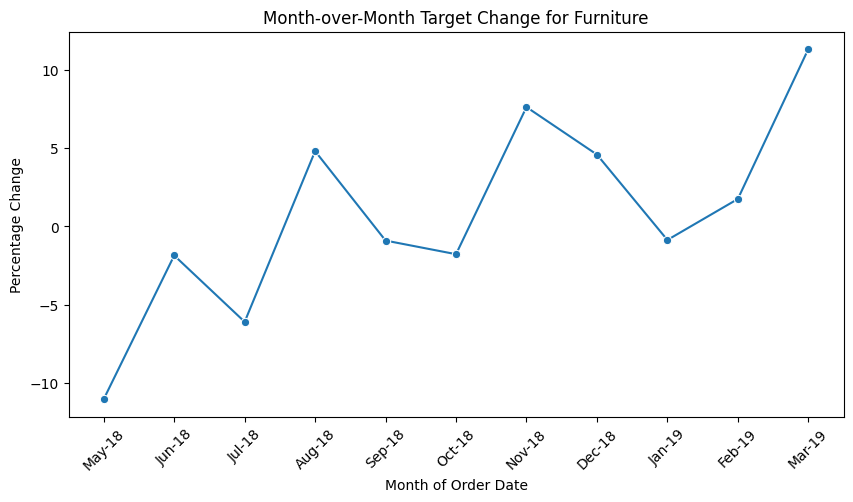

In [ ]:
# Plot trend
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month of Order Date", y="Target Change %", data=furniture_target, marker="o")
plt.xticks(rotation=45)
plt.title("Month-over-Month Target Change for Furniture")
plt.ylabel("Percentage Change")
plt.show()


In [ ]:
# Part 3: Regional Performance Insights
#From the List of Orders dataset, identify the top 5 states with the highest order
#count. For each of these states, calculate the total sales and average profit.
#Highlight any regional disparities in sales or profitability. Suggest regions or cities
# that should be prioritized for improvement.
state_orders = orders_df["State"].value_counts().nlargest(5).reset_index()
#to find state with 5 largest orders
state_orders.columns = ["State", "Order Count"]
#choose only column state and order count
regional_sales = merged_df.groupby("State")["Amount"].sum().reset_index()
#grouping state and their amount
regional_profit = merged_df.groupby("State")["Profit"].mean().reset_index()
##grouping state and their profit
regional_analysis = state_orders.merge(regional_sales, on="State").merge(regional_profit, on="State")
#merge the three information on basis of state
print("\nTop 5 States with Highest Orders:")
print(regional_analysis)

# Highlight regional disparities
low_performance_states = regional_analysis.sort_values("Profit", ascending=True).head(2)
print("\nStates with Lowest Profitability:")
print(low_performance_states)



Top 5 States with Highest Orders:
            State  Order Count    Amount     Profit
0  Madhya Pradesh          101  105140.0  16.326471
1     Maharashtra           90   95348.0  21.296552
2       Rajasthan           32   21149.0  16.986486
3         Gujarat           27   21058.0   5.344828
4          Punjab           25   16786.0 -10.150000

States with Lowest Profitability:
     State  Order Count   Amount     Profit
4   Punjab           25  16786.0 -10.150000
3  Gujarat           27  21058.0   5.344828


Improve Pricing Strategy
- Punjab: Negative profitability suggests deep discounts or high costs. Optimize pricing and reduce unnecessary discounts.
- Gujarat: Slightly positive profit but still low. Consider bundling products or offering strategic promotions.

- Identify low-margin products being sold in these states and adjust inventory to focus on higher-margin items.
- Promote value-added services like extended warranties or premium delivery.